In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [17]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train.to_numpy().shape

(42000, 785)

In [19]:
test.to_numpy().shape

(28000, 784)

In [20]:
np.max(train.to_numpy()[0])

255

In [21]:
train_label = train.label.to_numpy()
train_image=train.to_numpy()[0:,1:].reshape(42000,28,28,1)
test_image = test.to_numpy().reshape(28000,28,28,1)

In [22]:
train_image = train_image.astype(float) / 255.0
test_image = test_image.astype(float) / 255.0

(28, 28, 1)


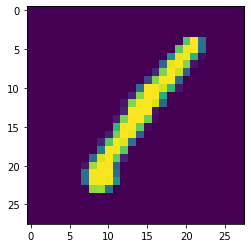

In [23]:
img = train_image[0]
print(img.shape)
plt.imshow(img.squeeze())

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import InputLayer, Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Flatten, Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

In [25]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(32,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(Conv2D(32,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(Conv2D(64,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(Conv2D(64,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(Conv2D(128,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(Conv2D(128,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(Conv2D(256,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(Conv2D(256,3,padding='same'))
model.add(LeakyReLU(0.2))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024))
model.add(LeakyReLU(0.2))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Dense(10))

In [26]:
model.compile(optimizer=Adam(0.002),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0

In [28]:
history = model.fit(train_image,train_label,batch_size=64,epochs=20,validation_split=0.2,shuffle=True)

Epoch 1/20
525/525 [==============================] - 14s 12ms/step - loss: 0.4094 - accuracy: 0.8798 - val_loss: 0.0986 - val_accuracy: 0.9751
Epoch 2/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0969 - accuracy: 0.9730 - val_loss: 0.0826 - val_accuracy: 0.9775
Epoch 3/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0743 - accuracy: 0.9784 - val_loss: 0.0503 - val_accuracy: 0.9867
Epoch 4/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0526 - accuracy: 0.9845 - val_loss: 0.0512 - val_accuracy: 0.9864
Epoch 5/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 0.0450 - val_accuracy: 0.9885
Epoch 6/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0472 - accuracy: 0.9865 - val_loss: 0.0663 - val_accuracy: 0.9833
Epoch 7/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0466 - accuracy: 0.9860 - val_loss: 0.0711 - val_accuracy: 0.9820
Ep

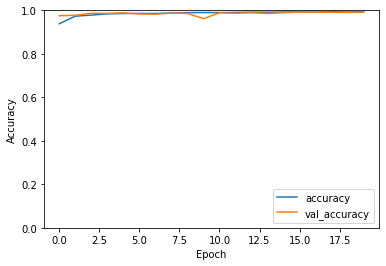

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

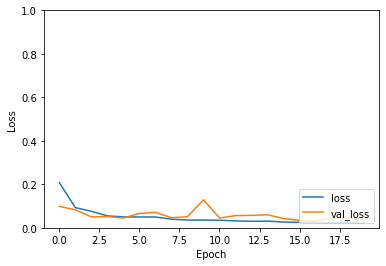

In [30]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [31]:
predictions = model.predict(test_image)

In [32]:
subs = []
for p in predictions:
    subs.append(p.argmax())


In [33]:
submission = pd.DataFrame({'ImageId' : range(1,28001), 'Label' : list(subs)})
submission.head(10)
submission.shape

(28000, 2)

In [34]:
submission.to_csv("submission.csv",index=False)